## Assignment 1

## Goodness of fit test

### Initialization

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

import sys
sys.path.append('../HW4_bm2393')
from getCitiBikeCSV import getCitiBikeCSV

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring1 = '201605'
getCitiBikeCSV(datestring1)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]

#### Clean the data

In [4]:
df2 = df[['age']].dropna()

df2.head()

,age
1,39.0
2,36.0
4,35.0
5,25.0
6,30.0


## Idea: Is the age distribution of Citi Bike riders normally distributed?

### First step: visualize the distribution

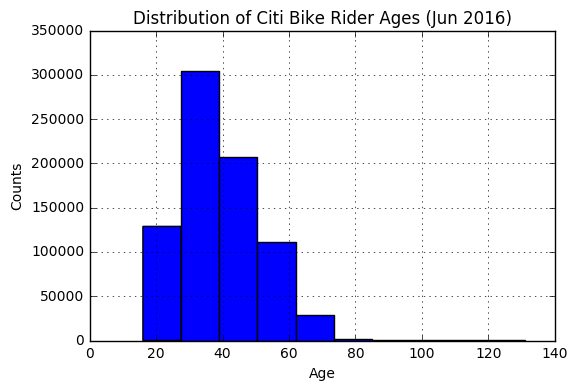

In [5]:
df2.hist()
pl.title('Distribution of Citi Bike Rider Ages (Jun 2016)')
pl.ylabel('Counts')
pl.xlabel('Age')

Figure 1: The histogram of Citi Bike rider ages is somewhat bell shaped but perhaps skewed right. 

## Test 1: Goodness of fit KS test

### Null Hypothesis: The sample of ages of Citi Bike riders comes from a Gaussian distribution

### Alternate Hypothesis: The sample of ages of Citi Bike riders does not come from a Gaussian distribution

### Significance level: .05

In [6]:
scipy.stats.kstest(df2.age, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

### Result: The pvalue of 0.0 indicates we should reject the null hypothesis and declare that the distributions of ages of Citi Bike riders is not Gaussian.

## Test 2: Anderson Darling

### Null Hypothesis: The sample of ages of Citi Bike riders comes from a Gaussian distribution

### Alternate Hypothesis: The sample of ages of Citi Bike riders does not come from a Gaussian distribution

### Significance level: .05

In [7]:
scipy.stats.anderson(df2.age, 'norm')

AndersonResult(statistic=10559.188019634224, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### Result: The test statstic of over 10000 is way larger than the critical value of .787 associated with the 5% significance level. Therefore, I can reject the null hypothesis and again declare that the ages of Citi Bike riders is not Normally distributed.

## Another idea: We now know that the ages of Citi Bike riders is not Gaussian. Does it come from a logistic distribution?

## Test 1: KS test

### Null Hypothesis: The sample of ages of Citi Bike riders comes from a logistic distribution.

### Alternate Hypothesis: The sample of ages of Citi Bike riders does not come from a logistic distribution.

### Significance level: .05

In [8]:
scipy.stats.kstest(df2.age, 'logistic')

KstestResult(statistic=0.99999988746483792, pvalue=0.0)

### Result: The p-value of 0.0 indicates that we can reject the null hypothesis and say that the distribution of ages of Citi Bike riders is not Poisson with mu = mean of Citi Bike rider ages.

## Test 2: AD test

### Null Hypothesis: The sample of ages of Citi Bike riders comes from a logistic distribution.

### Alternate Hypothesis: The sample of ages of Citi Bike riders does not come from a logistic distribution.

### Significance level: .05

In [9]:
scipy.stats.anderson(df2.age, 'logistic')

AndersonResult(statistic=10015.505994369858, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### Result: The test statistic of over 10000 is way larger than the critical value of .66 associated with the 5% significance level. Therefore, I can reject the null hypothesis and again declare that the ages of Citi Bike riders is not logistically distributed.